In [6]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import eigh
import sys
import itertools
import time
from matplotlib import pyplot as plt

In [7]:
os.chdir(r'C:\Users\WANGLIN CAI\fintech545\Week03')

In [8]:
DR = pd.read_csv('DailyReturn.csv')

In [26]:
DR.head(5)

,Unnamed: 0,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
55,2022/1/10,-0.001244,0.000116,0.000732,-0.006570,0.030342,0.012060,0.011456,-0.011212,0.005615,...,-0.005721,-0.007698,0.015471,0.009240,0.011647,0.008635,0.001062,-0.019271,0.004462,-0.025410
56,2022/1/11,0.009108,0.016784,0.002259,0.024002,0.005935,0.007691,0.010417,0.019203,0.015219,...,0.006249,0.003431,-0.020974,0.018955,0.003884,0.002450,0.016373,0.006386,0.005667,0.023727
57,2022/1/12,0.002704,0.002570,0.010445,-0.000937,0.039290,0.012126,0.011645,-0.003320,0.006543,...,0.004870,0.001635,0.000202,0.000691,-0.001658,-0.007799,-0.000522,-0.006996,0.010204,-0.010780
58,2022/1/13,-0.013779,-0.019028,-0.042323,-0.024170,-0.067491,-0.020105,-0.017769,-0.020344,-0.050859,...,0.006758,0.004008,0.016569,-0.022849,-0.005121,0.010739,-0.000522,0.012125,0.006633,-0.010898
59,2022/1/14,0.000409,0.005111,0.017717,0.005732,0.017498,0.006447,0.004711,0.016601,0.013810,...,-0.013321,0.006801,0.009938,0.013076,-0.001530,0.020374,-0.004405,-0.010847,0.009585,-0.019694


In [20]:
DR.iloc[:,1:102].cov()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
SPY,0.000078,0.000092,1.010179e-04,0.000086,0.000192,0.000093,0.000094,0.000115,0.000221,3.138730e-05,...,0.000070,0.000029,-0.000012,0.000098,0.000010,2.342080e-05,0.000087,0.000120,0.000086,0.000085
AAPL,0.000092,0.000257,1.557756e-04,0.000164,0.000321,0.000122,0.000123,0.000122,0.000319,4.840384e-07,...,0.000040,-0.000009,-0.000062,0.000143,0.000006,-1.772938e-06,0.000077,0.000093,0.000044,0.000078
MSFT,0.000101,0.000156,2.547999e-04,0.000130,0.000302,0.000201,0.000199,0.000148,0.000349,-6.264725e-06,...,0.000009,0.000002,-0.000045,0.000114,-0.000026,4.834127e-07,0.000082,0.000071,0.000025,0.000066
AMZN,0.000086,0.000164,1.297129e-04,0.000261,0.000166,0.000155,0.000154,0.000152,0.000401,-6.332347e-06,...,0.000018,0.000010,-0.000044,0.000132,0.000003,-2.135792e-05,0.000069,0.000025,0.000037,0.000109
TSLA,0.000192,0.000321,3.018838e-04,0.000166,0.002052,0.000169,0.000178,0.000275,0.000732,-2.088436e-05,...,0.000129,-0.000085,-0.000136,0.000274,0.000041,5.138087e-05,0.000135,0.000316,0.000177,0.000154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMT,0.000023,-0.000002,4.834127e-07,-0.000021,0.000051,-0.000008,0.000005,0.000146,-0.000129,3.723024e-05,...,0.000045,0.000014,0.000032,0.000019,0.000006,3.132292e-04,0.000046,0.000096,0.000059,0.000045
SYK,0.000087,0.000077,8.152754e-05,0.000069,0.000135,0.000091,0.000091,0.000120,0.000125,5.124850e-05,...,0.000104,0.000031,0.000022,0.000118,0.000015,4.600008e-05,0.000260,0.000181,0.000123,0.000129
GM,0.000120,0.000093,7.144827e-05,0.000025,0.000316,0.000079,0.000083,0.000119,0.000285,1.153542e-04,...,0.000234,0.000051,0.000057,0.000164,0.000019,9.552426e-05,0.000181,0.000730,0.000236,0.000194
TFC,0.000086,0.000044,2.494068e-05,0.000037,0.000177,0.000041,0.000041,0.000099,0.000126,1.226939e-04,...,0.000257,0.000067,0.000043,0.000084,0.000030,5.885253e-05,0.000123,0.000236,0.000301,0.000094


In [162]:
def getweight(matrix, L):
    
    nrows = matrix.shape[0]
    weights = np.zeros(nrows)
    
    for i in range(1,nrows+1):
        weights[i-1] = (1 - L) * (L**(i-1))
        
    return weights/weights.sum()

#weights = getweight(0.97,DR.shape[0])

def weightedcov(matrix, L):
    
    weights = getweight(matrix, L)
    weightedcov = np.zeros([matrix.shape[1], matrix.shape[1]])
    
    for i in range(0,matrix.shape[0]):
        w = weights[i]
        x = np.asmatrix(matrix[i,:]-matrix[i,:].mean())
        weightedcov += np.dot(np.dot(w,x).T,x)
        
    return weightedcov

wcov = weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.97)
wcov



array([[ 3.86288511e-06,  1.52059856e-05,  1.93204344e-05, ...,
        -1.42056816e-05, -1.16327578e-05,  5.01017431e-07],
       [ 1.52059856e-05,  1.72836814e-04,  5.57443294e-05, ...,
        -4.88781235e-05, -4.03577438e-05,  4.27103200e-06],
       [ 1.93204344e-05,  5.57443294e-05,  1.77344032e-04, ...,
        -7.96223664e-05, -7.90683802e-05, -1.86135008e-05],
       ...,
       [-1.42056816e-05, -4.88781235e-05, -7.96223664e-05, ...,
         4.87878044e-04,  3.39439295e-05,  5.03572341e-05],
       [-1.16327578e-05, -4.03577438e-05, -7.90683802e-05, ...,
         3.39439295e-05,  1.47587815e-04, -1.94320736e-05],
       [ 5.01017431e-07,  4.27103200e-06, -1.86135008e-05, ...,
         5.03572341e-05, -1.94320736e-05,  1.85826826e-04]])

In [30]:
wcov = weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.97)
pd.DataFrame(wcov).iloc[:5,:5]

,0,1,2,3,4
0,0.000004,0.000015,0.000019,0.000017,0.000027
1,0.000015,0.000173,0.000056,0.000097,0.000082
2,0.000019,0.000056,0.000177,0.000056,0.000083
3,0.000017,0.000097,0.000056,0.000228,-0.000106
4,0.000027,0.000082,0.000083,-0.000106,0.002008


In [14]:
def simulate_pca(matrix):
    col = []
    for i in range(1, matrix.shape[0]+1):
            
        # Eigenvalue decomposition
        vals, vecs = linalg.eig(matrix)
        vals = vals.real
        vecs = vecs.real
        
        rank = vals.argsort()
        vals = vals[rank]
        vecs = vecs[:, rank]
        
        # sort from big to small
        flip = [i for i in range(len(vals)-1, -1, -1)]
        vals = vals[flip]
        vecs = vecs[:, flip]

        tv = sum(vals)

        posv = np.where(vals >= 1e-8)[0]
        if i < len(posv):
            posv = posv[:i]

        vals = vals[posv]
        vecs = vecs[:, posv]

        col.append(sum(vals)/tv*100)
    return col
    '''
    print(f"Simulating with {len(posv)} PC Factors: {sum(vals)/tv*100:.2f}% total variance explained")
    B = np.dot(vecs, np.diag(np.sqrt(vals)))
    
    matrix = len(vals)
    r = np.random.randn(matrix, nsim)

    return np.dot(B, r).T
    '''
data_1 = pd.DataFrame()
data_1['0.1'] = simulate_pca(weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.1))
data_1['0.3'] = simulate_pca(weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.3))
data_1['0.5'] = simulate_pca(weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.5))
data_1['0.7'] = simulate_pca(weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.7))
data_1['0.9'] = simulate_pca(weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.9))
data_1['0.97'] = simulate_pca(weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.97))


In [15]:
data_1

,0.1,0.3,0.5,0.7,0.9,0.97
0,88.206919,66.876154,47.404189,29.736156,16.218654,17.198561
1,99.115104,91.679116,76.620115,54.871920,29.565889,28.032374
2,99.874669,96.861082,86.916596,68.535799,40.436983,35.291471
3,99.988662,99.165618,94.180583,79.282425,49.287415,41.762350
4,99.999142,99.807144,97.653078,87.297130,56.344945,47.560228
...,...,...,...,...,...,...
96,99.999993,99.999967,99.999940,99.999915,100.000000,100.000000
97,99.999993,99.999967,99.999940,99.999915,100.000000,100.000000
98,99.999993,99.999967,99.999940,99.999915,100.000000,100.000000
99,99.999993,99.999967,99.999940,99.999915,100.000000,100.000000


Text(0, 0.5, 'cumulative variance explained')

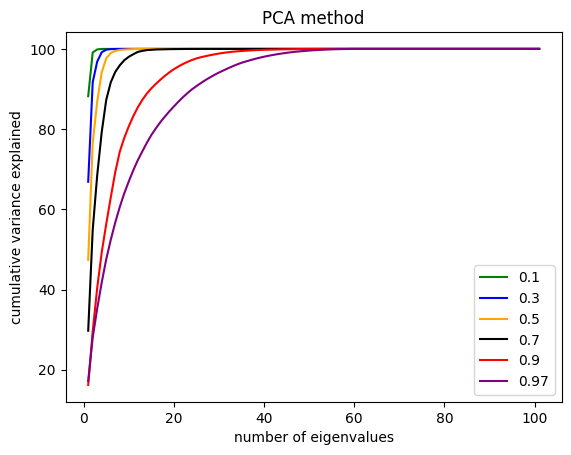

In [20]:
plt.title('PCA method')
x = np.arange(1,102)
plt.plot(x, data_1['0.1'], color = 'green', label='0.1')
plt.plot(x, data_1['0.3'], color = 'blue', label='0.3')
plt.plot(x, data_1['0.5'], color = 'orange', label='0.5')
plt.plot(x, data_1['0.7'], color = 'black', label='0.7')
plt.plot(x, data_1['0.9'], color = 'red', label='0.9')
plt.plot(x, data_1['0.97'], color = 'purple', label='0.97')
plt.legend()
plt.xlabel('number of eigenvalues')
plt.ylabel('cumulative variance explained')


In [19]:
## problem 2
# implementation of chol_psd, near_psd and Higham psd

In [39]:
def chol_psd(matrix):
    n = matrix.shape[0]
    # Initialize the root matrix with 0 values
    root = np.zeros([n,n])

    # Loop over columns
    for j in range(n):
        s = 0.0
        # If we are not on the first column, calculate the dot product of the preceding row values.
        if j > 0:
            s = np.dot(root[j, :j], root[j, :j])
        #print(root[j, :j])
        #print(s)

        # Diagonal Element
        temp = matrix[j, j] - s
        if temp < 0.0 and temp > -1e-8:
            temp = 0.0
        root[j, j] = np.sqrt(temp)

        # Check for the 0 eigenvalue. Just set the column to 0 if we have one
        if root[j, j] == 0.0:
            root[j, j+1:].fill(0.0)
        else:
            # Update off-diagonal rows of the column
            ir = 1.0 / root[j, j]
            for i in range(j+1, n):
                s = np.dot(root[i, :j], root[j, :j])
                root[i, j] = (matrix[i, j] - s) * ir
    
    return root

root_matrix = chol_psd(wcov)
np.dot(root_matrix,root_matrix.T)


array([[ 3.86288511e-06,  1.52059856e-05,  1.93204344e-05, ...,
        -1.42056816e-05, -1.16327578e-05,  5.01017431e-07],
       [ 1.52059856e-05,  1.72836814e-04,  5.57443294e-05, ...,
        -4.88781235e-05, -4.03577438e-05,  4.27103200e-06],
       [ 1.93204344e-05,  5.57443294e-05,  1.77344032e-04, ...,
        -7.96223664e-05, -7.90683802e-05, -1.86135008e-05],
       ...,
       [-1.42056816e-05, -4.88781235e-05, -7.96223664e-05, ...,
         4.87878044e-04,  3.39439295e-05,  5.03572341e-05],
       [-1.16327578e-05, -4.03577438e-05, -7.90683802e-05, ...,
         3.39439295e-05,  1.47587815e-04, -1.94320736e-05],
       [ 5.01017431e-07,  4.27103200e-06, -1.86135008e-05, ...,
         5.03572341e-05, -1.94320736e-05,  1.85826826e-04]])

In [40]:
wcov

array([[ 3.86288511e-06,  1.52059856e-05,  1.93204344e-05, ...,
        -1.42056816e-05, -1.16327578e-05,  5.01017431e-07],
       [ 1.52059856e-05,  1.72836814e-04,  5.57443294e-05, ...,
        -4.88781235e-05, -4.03577438e-05,  4.27103200e-06],
       [ 1.93204344e-05,  5.57443294e-05,  1.77344032e-04, ...,
        -7.96223664e-05, -7.90683802e-05, -1.86135008e-05],
       ...,
       [-1.42056816e-05, -4.88781235e-05, -7.96223664e-05, ...,
         4.87878044e-04,  3.39439295e-05,  5.03572341e-05],
       [-1.16327578e-05, -4.03577438e-05, -7.90683802e-05, ...,
         3.39439295e-05,  1.47587815e-04, -1.94320736e-05],
       [ 5.01017431e-07,  4.27103200e-06, -1.86135008e-05, ...,
         5.03572341e-05, -1.94320736e-05,  1.85826826e-04]])

In [66]:
def near_PSD(matrix, epsilon=0.0):
    # check if the matrix is a correlation matrix - if all numbers on the diagonal are one
    matrix_diag = np.diag(matrix)
    for i in matrix_diag:
        assert i == 1
    
    # calculate the eigenvalues and eigenvectors
    e_val, e_vec = eigh(matrix)
    
    # sort eigenvalues and corresponding eigenvectors in a descending order
    index = np.argsort(-1 * e_val)
    d_e_val = e_val[index]
    d_e_vec = e_vec[:,index]
    
    # set eigenvalues that are smaller than epsilon to epsilon
    d_e_val[d_e_val < epsilon] = epsilon
    
    # construct the scaling diagonal matrix, calculating t(s) and store them into the list called t_vec
    t_vec = []
    for i in range(len(d_e_val)):
        sum_t = 0
        for j in range(len(d_e_val)):
            t = pow(d_e_vec[i][j],2) * d_e_val[j]
            sum_t += t
        t_i = 1 / sum_t
        t_vec.append(t_i)
    
    # construct the resulting near_PSD matrix
    B_matrix = np.diag(np.sqrt(t_vec)) @ d_e_vec @ np.diag(np.sqrt(d_e_val))
    B_matrix_transpose = B_matrix.transpose()
    C_prime_matrix = B_matrix @ B_matrix_transpose
    
    # checking if eigenvalues are all non-negative now (assuming all significantly small eigenvalues are zero, the tolerance level here is set to be -1e-8)
    result_vals, result_vecs = eigh(C_prime_matrix)
    neg_result_vals = result_vals[result_vals < 0]
    if neg_result_vals.any() < -1e-8:
        print("There are still significantly negative eigenvalues, recommend to run the function again over the result until a PSD is generated")
    
    return C_prime_matrix


In [72]:
# define a function to calculate Frobenius Norm
def F_Norm(matrix):
    # get the number of rows and columns of the input matrix
    size = matrix.shape
    rows = size[0]
    columns = size[1]
    
    # compute the norm
    sum = 0
    for i in range(rows):
        for j in range(columns):
            square = pow(matrix[i][j],2)
            sum += square
    
    return sum

# define a function calculating PSD via Higham's method
def Higham(matrix, tolerance=1e-8):
    # set up delta S, Y, and gamma
    delta_s = np.full(matrix.shape,0)
    Y = matrix.copy()
    gamma_last = sys.float_info.max
    gamma_now = 0
    
    # start the actual iteration
    for i in itertools.count(start=1):        
        R = Y - delta_s
        
        # conduct the second projection of Higham's method over R
        Rval, Rvec = eigh(R)
        Rval[Rval < 0] = 0
        Rvec_transpose = Rvec.transpose()
        
        X = Rvec @ np.diag(Rval) @ Rvec_transpose
        
        delta_s = X - R
        
        # conduct the first projection of Higham's method over X
        size_X = X.shape
        for i in range(size_X[0]):
            for j in range(size_X[1]):
                if i == j:
                    Y[i][j] = 1
                else:
                    Y[i][j] = X[i][j]
        
        difference_mat = Y - matrix
        gamma_now = F_Norm(difference_mat)
        
        # get eigenvalues and eigenvectors of updated Y
        Yval, Yvec = eigh(Y)
        
        #set breaking conditions
        if np.amin(Yval) > -1*tolerance:
            break
        else:
            gamma_last = gamma_now
    
    return Y



In [37]:
# generate a N * N non-psd correlation matrix
N = 1000
n_psd = np.full((N, N), 0.9)
for i in range(N):
    n_psd[i][i] = 1.0
n_psd[0][1] = 0.7357
n_psd[1][0] = 0.7357
n_psd



array([[1.    , 0.7357, 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.7357, 1.    , 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.9   , 0.9   , 1.    , ..., 0.9   , 0.9   , 0.9   ],
       ...,
       [0.9   , 0.9   , 0.9   , ..., 1.    , 0.9   , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 1.    , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 0.9   , 1.    ]])

In [67]:
near_PSD(n_psd)

array([[1.        , 0.74387594, 0.88590719, ..., 0.88590719, 0.88590719,
        0.88590719],
       [0.74387594, 1.        , 0.88590719, ..., 0.88590719, 0.88590719,
        0.88590719],
       [0.88590719, 0.88590719, 1.        , ..., 0.90000001, 0.90000001,
        0.90000001],
       ...,
       [0.88590719, 0.88590719, 0.90000001, ..., 1.        , 0.90000001,
        0.90000001],
       [0.88590719, 0.88590719, 0.90000001, ..., 0.90000001, 1.        ,
        0.90000001],
       [0.88590719, 0.88590719, 0.90000001, ..., 0.90000001, 0.90000001,
        1.        ]])

In [77]:
N = np.arange(50,501,step=50)
f = []
for nn in N:
    n_psd = np.full((nn, nn), 0.9)
    for i in range(nn):
        n_psd[i][i] = 1.0
    n_psd[0][1] = 0.7357
    n_psd[1][0] = 0.7357
    n_psd

    n = near_PSD(n_psd)
    f.append(F_Norm(n - n_psd))

In [79]:
f_2 = []
for nn in N:
    n_psd = np.full((nn, nn), 0.9)
    for i in range(nn):
        n_psd[i][i] = 1.0
    n_psd[0][1] = 0.7357
    n_psd[1][0] = 0.7357
    n_psd

    h = Higham(n_psd)
    f_2.append(F_Norm(h - n_psd))

Text(0, 0.5, 'Frobenius Norm')

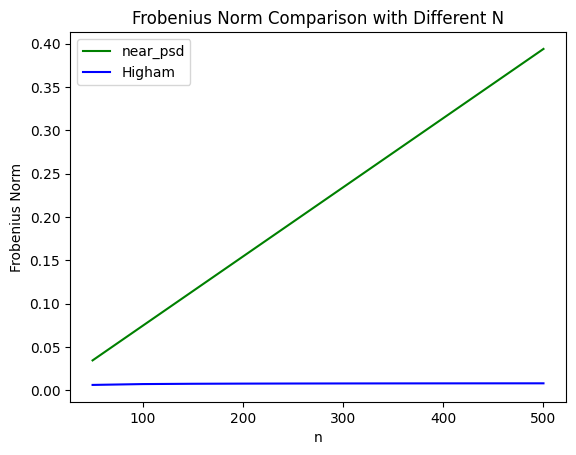

In [80]:

plt.title('Frobenius Norm Comparison with Different N')
plt.plot(N, f, color = 'green', label='near_psd')
plt.plot(N, f_2, color = 'blue', label='Higham')
plt.legend()
plt.xlabel('n')
plt.ylabel('Frobenius Norm')

In [70]:
# implement near_PSD()
# execute the above function, and print execution time used
st = time.time()
n = near_PSD(n_psd)
et = time.time()
exe_time = et - st
print("Execution time:", exe_time, "seconds")

# Check eigenvalues of the resulting matrix
nval, nvec = eigh(n)
np.where(nval<0)

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
F_Norm(n - n_psd)

Execution time: 1.6926679611206055 seconds
[4.44347298e-16 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e-02 9.99999872e-02
 9.99999872e-02 9.99999872e-02 9.99999872e

0.7929738933947517

In [ ]:
# implement Higham()
# execute the above function, and print execution time used
st_2 = time.time()
h = Higham(n_psd)
et_2 = time.time()
exe_time_2 = et_2 - st_2
print("Execution time:", exe_time_2, "seconds")

# Check eigenvalues of the resulting matrix
hval_2, hvec_2 = eigh(h)
hval_2

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
F_Norm(h - n_psd)

In [73]:
Higham(n_psd)

array([[1.        , 0.79928959, 0.8998726 , ..., 0.8998726 , 0.8998726 ,
        0.8998726 ],
       [0.79928959, 1.        , 0.8998726 , ..., 0.8998726 , 0.8998726 ,
        0.8998726 ],
       [0.8998726 , 0.8998726 , 1.        , ..., 0.90000026, 0.90000026,
        0.90000026],
       ...,
       [0.8998726 , 0.8998726 , 0.90000026, ..., 1.        , 0.90000026,
        0.90000026],
       [0.8998726 , 0.8998726 , 0.90000026, ..., 0.90000026, 1.        ,
        0.90000026],
       [0.8998726 , 0.8998726 , 0.90000026, ..., 0.90000026, 0.90000026,
        1.        ]])

In [74]:
np.where(nval<0)

(array([], dtype=int64),)

In [81]:
N = np.arange(50,501,step=50)
f = []
for nn in N:
    n_psd = np.full((nn, nn), 0.9)
    for i in range(nn):
        n_psd[i][i] = 1.0
    n_psd[0][1] = 0.7357
    n_psd[1][0] = 0.7357
    
    st = time.time()
    n = near_PSD(n_psd)
    et = time.time()
    f.append(et - st)

f_2 = []
for nn in N:
    n_psd = np.full((nn, nn), 0.9)
    for i in range(nn):
        n_psd[i][i] = 1.0
    n_psd[0][1] = 0.7357
    n_psd[1][0] = 0.7357

    st_2 = time.time()
    h = Higham(n_psd)
    et_2 = time.time()
    
    f_2.append(et_2 - st_2)

Text(0, 0.5, 'Frobenius Norm')

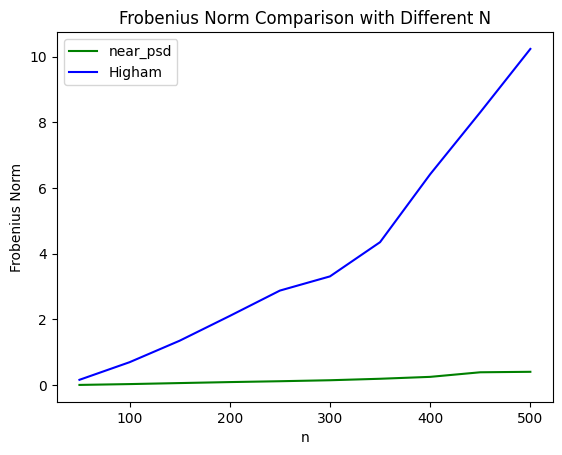

In [82]:

plt.title('Frobenius Norm Comparison with Different N')
plt.plot(N, f, color = 'green', label='near_psd')
plt.plot(N, f_2, color = 'blue', label='Higham')
plt.legend()
plt.xlabel('n')
plt.ylabel('Frobenius Norm')

In [168]:
# problem 3

def simulate_pca(matrix, nsim, nval = None):
            
    # Eigenvalue decomposition
    vals, vecs = linalg.eig(matrix)
    vals = vals.real
    vecs = vecs.real
    
    rank = vals.argsort()
    vals = vals[rank]
    vecs = vecs[:, rank]
    
    # sort from big to small
    flip = [i for i in range(len(vals)-1, -1, -1)]
    vals = vals[flip]
    vecs = vecs[:, flip]
    #print(vals)
    tv = sum(vals)

    posv = np.where(vals >= 1e-8)[0]
    if nval != None:
        if nval < len(posv):
            posv = posv[:nval]

    vals = vals[posv]
    vecs = vecs[:, posv]

    print(f"Simulating with {len(posv)} PC Factors: {sum(vals)/tv*100:.2f}% total variance explained")
    B = np.dot(vecs, np.diag(np.sqrt(vals)))
    
    r = np.random.randn(len(vals), nsim)

    return np.dot(B, r)

def direct_simulate(a, nsim):
    # get eigenvalues and eigenvectors of the input matrix
    val, vec = eigh(a)
    sort_index = np.argsort(-1 * val)
    d_sorted_val = val[sort_index]
    d_sorted_vec = vec[:,sort_index]
    
    # to check if all eigenvalues are non-negative or negative but effectively zero, and set all effectively-zero eigenvalues to zero
    assert np.amin(d_sorted_val) > -1e-8
    d_sorted_val[d_sorted_val<0] = 0
    
    # construct the matrix for the simulating process
    B = d_sorted_vec @ np.diag(np.sqrt(d_sorted_val))
    r = np.random.randn(len(d_sorted_val),nsim)
    
    result = np.dot(B, r)
    
    return result


In [123]:
# generate a N * N non-psd correlation matrix
N = 100
n_psd = np.full((N, N), 0.9)
for i in range(N):
    n_psd[i][i] = 1.0
n_psd[0][1] = 0.7357
n_psd[1][0] = 0.7357
n_psd


array([[1.    , 0.7357, 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.7357, 1.    , 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.9   , 0.9   , 1.    , ..., 0.9   , 0.9   , 0.9   ],
       ...,
       [0.9   , 0.9   , 0.9   , ..., 1.    , 0.9   , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 1.    , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 0.9   , 1.    ]])

In [163]:
np.cov(simulate_pca(n_psd, 25000, nval = None)

Simulating with 99 PC Factors: 100.06% total variance explained


array([[ 1.1879193 , -0.24902943, -0.45047059, ...,  1.43518791,
        -0.58709555, -0.70962988],
       [ 1.43585534,  0.63632264, -0.43816213, ...,  2.16692017,
        -0.52264512, -1.21017767],
       [ 0.84685908,  0.48665052, -0.30078612, ...,  1.6670532 ,
        -0.68874572, -1.00208553],
       ...,
       [ 1.01689564,  0.18773296, -0.70235366, ...,  1.83108881,
        -0.1924842 , -1.04468962],
       [ 1.32959908, -0.53390326, -0.31190687, ...,  1.77659646,
        -0.60502475, -1.12870014],
       [ 1.79827058,  0.19746457, -0.53891826, ...,  1.64857563,
        -0.2144838 , -0.79284631]])

In [186]:
wcov = weightedcov(np.asmatrix(DR.iloc[:,1:102]), L = 0.97)
cov = np.cov(DR.iloc[:,1:102])

In [164]:
np.cov(simulate_pca(wcov, 25000, nval = None))

Simulating with 60 PC Factors: 100.00% total variance explained


array([[ 3.84224155e-06,  1.50188048e-05,  1.92565584e-05, ...,
        -1.44894175e-05, -1.17176532e-05,  3.75718970e-07],
       [ 1.50188048e-05,  1.69723241e-04,  5.54220770e-05, ...,
        -4.77176360e-05, -4.17014583e-05,  2.32767492e-06],
       [ 1.92565584e-05,  5.54220770e-05,  1.77694600e-04, ...,
        -8.16715226e-05, -7.99721154e-05, -1.84200244e-05],
       ...,
       [-1.44894175e-05, -4.77176360e-05, -8.16715226e-05, ...,
         4.92942254e-04,  3.48471387e-05,  4.93895073e-05],
       [-1.17176532e-05, -4.17014583e-05, -7.99721154e-05, ...,
         3.48471387e-05,  1.46332645e-04, -1.95936053e-05],
       [ 3.75718970e-07,  2.32767492e-06, -1.84200244e-05, ...,
         4.93895073e-05, -1.95936053e-05,  1.87389393e-04]])

In [169]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(direct_simulate(wcov, 25000))
et = time.time()
exe_time = et - st
print("Execution time:", exe_time, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
F_Norm(n - wcov)

Execution time: 0.5993995666503906 seconds


3.414994025214227e-08

In [176]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(wcov, 25000))
et = time.time()
exe_time = et - st
print("Execution time:", exe_time, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
F_Norm(n - wcov)

Simulating with 60 PC Factors: 100.00% total variance explained
Execution time: 0.07103133201599121 seconds


3.5418361872461544e-08

In [177]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(wcov, 25000, nval = 13))
et = time.time()
exe_time = et - st
print("Execution time:", exe_time, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
F_Norm(n - wcov)

Simulating with 13 PC Factors: 74.44% total variance explained
Execution time: 0.05301356315612793 seconds


2.232385242120468e-06

In [180]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(wcov, 25000, nval = 5))
et = time.time()
exe_time = et - st
print("Execution time:", exe_time, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
F_Norm(n - wcov)

Simulating with 5 PC Factors: 47.56% total variance explained
Execution time: 0.04590868949890137 seconds


9.819525369507181e-06

Text(0, 0.5, 'Frobenius Norm')

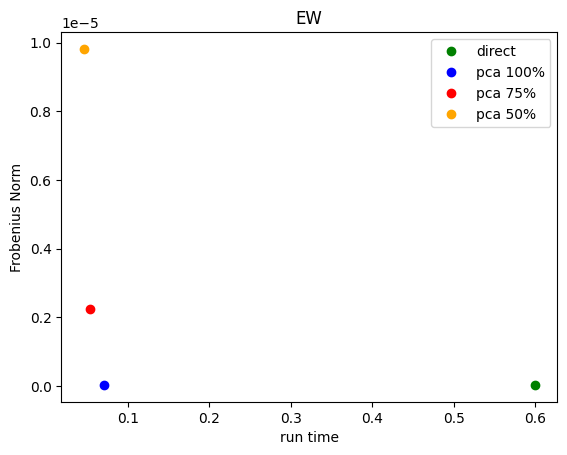

In [200]:
plt.title('EW')
plt.plot(0.5993995666503906 , 3.414994025214227e-08, 'o', color = 'green', label='direct')
plt.plot(0.07103133201599121, 3.5418361872461544e-08 ,'o', color = 'blue', label='pca 100%')
plt.plot(0.05301356315612793, 2.232385242120468e-06, 'o',color = 'red', label='pca 75%')
plt.plot(0.04590868949890137, 9.819525369507181e-06, 'o',color = 'orange', label='pca 50%')
plt.legend()
plt.xlabel('run time')
plt.ylabel('Frobenius Norm')

In [193]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(direct_simulate(cov, 25000))
et = time.time()
exe_time1 = et - st
print("Execution time:", exe_time1, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a1 = F_Norm(n - cov)

Execution time: 0.05800747871398926 seconds


In [194]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov, 25000))
et = time.time()
exe_time2 = et - st
print("Execution time:", exe_time2, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a2 = F_Norm(n - cov)

Simulating with 60 PC Factors: 100.00% total variance explained
Execution time: 0.052321434020996094 seconds


In [202]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov, 25000, nval = 14))
et = time.time()
exe_time3 = et - st
print("Execution time:", exe_time3, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a3 = F_Norm(n - cov)

Simulating with 14 PC Factors: 74.90% total variance explained
Execution time: 0.031000852584838867 seconds


In [203]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov, 25000, nval = 5))
et = time.time()
exe_time4 = et - st
print("Execution time:", exe_time4, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a4 = F_Norm(n - cov)

Simulating with 5 PC Factors: 50.00% total variance explained
Execution time: 0.022594690322875977 seconds


Text(0, 0.5, 'Frobenius Norm')

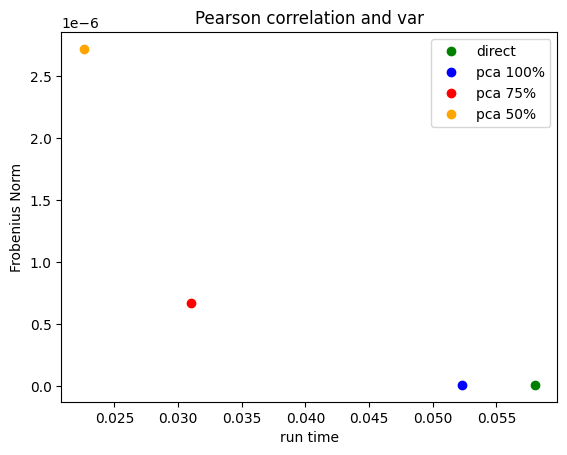

In [204]:
plt.title('Pearson correlation and var')
plt.plot( exe_time1, a1, 'o', color = 'green', label='direct')
plt.plot(exe_time2, a2 ,'o', color = 'blue', label='pca 100%')
plt.plot(exe_time3,a3 , 'o',color = 'red', label='pca 75%')
plt.plot(exe_time4, a4, 'o',color = 'orange', label='pca 50%')
plt.legend()
plt.xlabel('run time')
plt.ylabel('Frobenius Norm')

In [216]:
def exwVarMat(w_cov_mat):
    # the diagonal of exponentially weighted matrix is the expontially weighted variances
    w_var_mat = np.diag(w_cov_mat)
    
    return w_var_mat

w_var = exwVarMat(wcov)
w_std = np.sqrt(w_var)
# compute the exponentially weighted correlation matrix for later use
w_cor = np.zeros((len(wcov),len(wcov)))
std = DR.iloc[:,1:102].std()
# compute (normally computed) correlation matrix for later use
cor = DR.iloc[:,1:102].corr()

for i in range(len(wcov)):
    for j in range(len(wcov)):
        w_cor[i][j] = wcov[i,j] / (w_std[i] * w_std[j])
        
cov4 = np.zeros((len(w_cor),len(w_cor)))
for i in range(len(w_cor)):
    for j in range(len(w_cor)):
        cov4[i][j] = w_cor[i][j] * std[i] * std[j]

cov2 = np.zeros((len(cor),len(cor)))
for i in range(len(cor)):
    for j in range(len(cor)):
        cov2[i][j] = cor.iloc[i,j] * w_std[i] * w_std[j]

In [214]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(direct_simulate(cov4, 25000))
et = time.time()
exe_time1 = et - st
print("Execution time:", exe_time1, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a1 = F_Norm(n - cov4)

# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov4, 25000))
et = time.time()
exe_time2 = et - st
print("Execution time:", exe_time2, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a2 = F_Norm(n - cov4)

# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov4, 25000, nval = 13))
et = time.time()
exe_time3 = et - st
print("Execution time:", exe_time3, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a3 = F_Norm(n - cov4)

# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov4, 25000, nval = 5))
et = time.time()
exe_time4 = et - st
print("Execution time:", exe_time4, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a4 = F_Norm(n - cov4)

Execution time: 0.10488367080688477 seconds
Simulating with 60 PC Factors: 100.00% total variance explained
Execution time: 0.07800054550170898 seconds
Simulating with 13 PC Factors: 73.37% total variance explained
Execution time: 0.04815316200256348 seconds
Simulating with 5 PC Factors: 47.41% total variance explained
Execution time: 0.04100394248962402 seconds


Text(0, 0.5, 'Frobenius Norm')

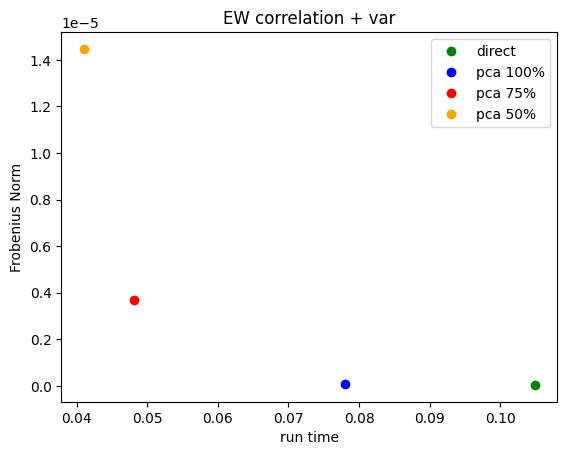

In [215]:
plt.title('EW correlation + var')
plt.plot( exe_time1, a1, 'o', color = 'green', label='direct')
plt.plot(exe_time2, a2 ,'o', color = 'blue', label='pca 100%')
plt.plot(exe_time3,a3 , 'o',color = 'red', label='pca 75%')
plt.plot(exe_time4, a4, 'o',color = 'orange', label='pca 50%')
plt.legend()
plt.xlabel('run time')
plt.ylabel('Frobenius Norm')

In [219]:
# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(direct_simulate(cov2, 25000))
et = time.time()
exe_time1 = et - st
print("Execution time:", exe_time1, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a1 = F_Norm(n - cov2)

# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov2, 25000))
et = time.time()
exe_time2 = et - st
print("Execution time:", exe_time2, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a2 = F_Norm(n - cov2)

# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov2, 25000, nval = 11))
et = time.time()
exe_time3 = et - st
print("Execution time:", exe_time3, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a3 = F_Norm(n - cov2)

# implement ew
# execute the above function, and print execution time used
st = time.time()
n = np.cov(simulate_pca(cov2, 25000, nval = 3))
et = time.time()
exe_time4 = et - st
print("Execution time:", exe_time4, "seconds")

# compute the Fabenious norm, as defined below, of the difference between resulting matrix n and original matrix n_psd
a4 = F_Norm(n - cov2)

Execution time: 0.10800385475158691 seconds
Simulating with 59 PC Factors: 100.00% total variance explained
Execution time: 0.07390689849853516 seconds
Simulating with 11 PC Factors: 73.80% total variance explained
Execution time: 0.04600119590759277 seconds
Simulating with 3 PC Factors: 45.87% total variance explained
Execution time: 0.043825626373291016 seconds


Text(0, 0.5, 'Frobenius Norm')

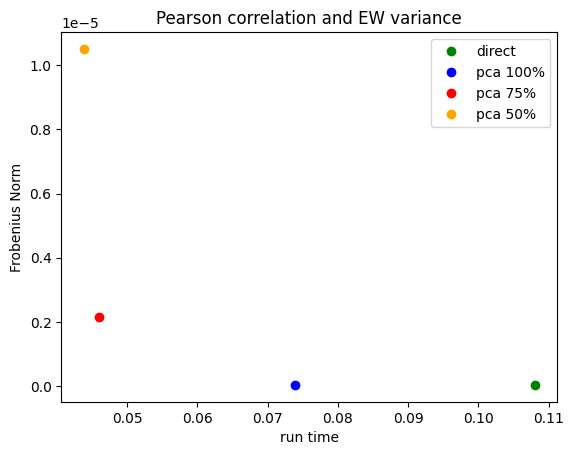

In [220]:
plt.title('Pearson correlation and EW variance')
plt.plot( exe_time1, a1, 'o', color = 'green', label='direct')
plt.plot(exe_time2, a2 ,'o', color = 'blue', label='pca 100%')
plt.plot(exe_time3,a3 , 'o',color = 'red', label='pca 75%')
plt.plot(exe_time4, a4, 'o',color = 'orange', label='pca 50%')
plt.legend()
plt.xlabel('run time')
plt.ylabel('Frobenius Norm')